In [41]:
# mehrdim. Datensatz mit mehreren Clustern generieren mit Hilfe v. Verteilungsfkt
# versucht die Daten mit KMeans zu clustern
# manipuliert die Daten und konstruiert Fälle in denen das Clustering nicht mehr wie gewünscht funktioniert
#(Daten skalieren, falsche Cluster Anzahl, vorgegebene Intialisierung

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from math import ceil
from math import factorial

In [37]:
# nrows muss momentan gerade sein!

class ClusterData:
    def __init__(self,nrows,dim):
        self.nrows = nrows
        self.dim = dim
        
    def make_dataset(self):
        """nr_clusters = 2"""
        nrows_cluster = int(self.nrows/2) # rows for 1 cluster
        data_array = np.zeros((self.nrows,self.dim))
        colnames = ["feature" + str(x) for x in range(1,self.dim+1)]
        df = pd.DataFrame(data = data_array, columns = colnames)
        for col in colnames:
            df.loc[0:nrows_cluster-1,col] = np.random.normal(0,1,nrows_cluster)
            df.loc[nrows_cluster:,col] = np.random.normal(10,1,nrows_cluster)
        return df
    
    def run_KMeans(self,data,n_clust):
        K = KMeans(n_clusters=n_clust).fit(data)
        return K
        
    def make_many_subplots(self,data,KMeansResults):
        nr_subplots = int(factorial(self.dim)/(factorial(2)*factorial(self.dim-2))) # Binomialkoeffizient
        print(nr_subplots)
        x_axis_features = [(self.dim-x)*[x] for x in range(1,self.dim)]
        x_axis_features = ["feature" + str(item) for sublist in x_axis_features for item in sublist] # just for flattening
        y_axis_features = [list(range(x+1,self.dim+1)) for x in range(1,self.dim)]
        y_axis_features = ["feature" + str(item) for sublist in y_axis_features for item in sublist] 
        features = list(zip(x_axis_features,y_axis_features)) # contents are called e.g. with features[2][1]
        display(features)
        subplot_rownr = ceil(nr_subplots/2)
        fig = plt.figure(figsize=(10,subplot_rownr*2))
        for plotnr in range(0,nr_subplots):
            xdata = data[features[plotnr][0]]
            ydata = data[features[plotnr][1]]
            xname = features[plotnr][0]
            yname = features[plotnr][1]
            plt.subplot(subplot_rownr,2,plotnr+1)
            plt.scatter(xdata,ydata,c = KMeansResults.labels_)
            plt.xlabel(xname)
            plt.ylabel(yname)
        plt.tight_layout()
        plt.show()

# nrows muss momentan gerade sein!
        
"""
clustdata = ClusterData(100,3)
a_df = clustdata.make_dataset()
with pd.option_context('display.max_rows', None, 'display.max_columns', 10): # shows the whole df 
    display(a_df)
res = clustdata.run_KMeans(a_df,3)
clustdata.make_many_subplots(a_df,res)
"""

"""
new_clustdata = ClusterData(100,4)
new_clustdata.dim
another_df = new_clustdata.make_dataset()
with pd.option_context('display.max_rows', None, 'display.max_columns', 10): # shows the whole df 
    display(another_df)
new_res = new_clustdata.run_KMeans(another_df,3)
new_clustdata.make_many_subplots(another_df,new_res)
"""
"""
new_clustdata = ClusterData(100,5)
new_clustdata.dim
another_df = new_clustdata.make_dataset()
with pd.option_context('display.max_rows', None, 'display.max_columns', 10): # shows the whole df 
    display(another_df)
new_res = new_clustdata.run_KMeans(another_df,3)
new_clustdata.make_many_subplots(another_df,new_res)
"""

"""
new_clustdata = ClusterData(100,10)
new_clustdata.dim
another_df = new_clustdata.make_dataset()
with pd.option_context('display.max_rows', None, 'display.max_columns', 10): # shows the whole df 
    display(another_df)
new_res = new_clustdata.run_KMeans(another_df,3)
new_clustdata.make_many_subplots(another_df,new_res)
"""

# not implemented: 
# check if necessary fcts run, catch errors etc
# don't print pics if nr_subplots > 20



"\nnew_clustdata = ClusterData(100,10)\nnew_clustdata.dim\nanother_df = new_clustdata.make_dataset()\nwith pd.option_context('display.max_rows', None, 'display.max_columns', 10): # shows the whole df \n    display(another_df)\nnew_res = new_clustdata.run_KMeans(another_df,3)\nnew_clustdata.make_many_subplots(another_df,new_res)\n"

In [49]:
# trying out the GaussianMixture method

dataobj = ClusterData(100,5) # 100 rows, 5 dimensions
df = dataobj.make_dataset()
df

KMeans = KMeans(n_clusters = 3).fit(df)
KMeans_labels = KMeans.labels_

GaussMix = GaussianMixture(n_components = 3,covariance_type="full").fit(df)
labels = GaussMix.predict(df)

Text(0.5,1,'GaussianMixture')

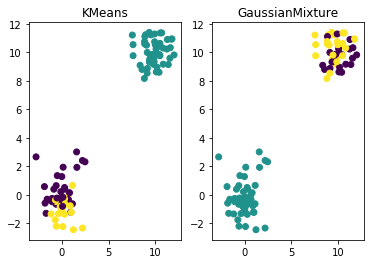

In [50]:
plt.subplot(1,2,1)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=KMeans_labels)
plt.title("KMeans")

plt.subplot(1,2,2)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels)
plt.title("GaussianMixture")

0     -1.724597
1      0.204122
2     -0.583494
3     -0.353783
4      1.648288
5     -0.481628
6      1.297121
7     -0.963085
8      0.387515
9      0.140230
10     1.038078
11     0.667654
12     0.839675
13    -0.018956
14     1.456424
15    -0.748134
16     0.720494
17     0.764839
18     1.469742
19     0.682692
20    -0.940780
21     0.009590
22    -0.163089
23    -1.526173
24    -0.239390
25     0.118242
26     0.178489
27    -0.058309
28     0.796031
29     0.988165
        ...    
70    10.812883
71    10.391906
72     8.421904
73    11.435837
74     8.773718
75     9.882823
76    10.187673
77    11.043583
78    11.115243
79    10.835688
80    10.674999
81    10.204883
82    11.002405
83    11.203652
84     8.573327
85     9.723864
86    10.692903
87     9.574128
88    10.437705
89     9.537357
90     9.602476
91    10.393918
92     7.913464
93     8.507265
94     8.848183
95     9.506203
96     8.806116
97    11.264592
98    11.019368
99     9.090619
Name: feature1, Length: 

In [ ]:
for plotnr in range(0,nr_subplots):
    xdata = data[features[plotnr][0]]
    ydata = data[features[plotnr][1]]
    xname = features[plotnr][0]
    yname = features[plotnr][1]
    plt.subplot(subplot_rownr,2,plotnr+1)
    plt.scatter(xdata,ydata,c = KMeansResults.labels_)
    plt.xlabel(xname)
    plt.ylabel(yname)
plt.tight_layout()
plt.show()